# Query 5 - Covid 19 Class Project 1 – Group 5

# For reference only - these bar Charts were not used for the final team presentation - this query generates Two Bar Charts used for Vaccines by Manufacturer and by Country. 

## CSV source file: country_vaccinations_by_manufacturer.csv

In [279]:
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from citipy import citipy
# from api_keys import weather_api_key
# from api_keys import g_key
import time as time
#import wget as wget

In [280]:
file_to_load = "csv_files/country_vaccinations_by_manufacturer.csv"
covid_19 = pd.read_csv(file_to_load)
confirmed_19_df = pd.DataFrame(covid_19)
# del confirmed_19_df["Unnamed: 0"]

In [281]:
confirmed_19_df.dtypes

location              object
date                  object
vaccine               object
total_vaccinations     int64
dtype: object

In [282]:
# Date from sting to datetime
confirmed_19_df['date'] = pd.to_datetime(confirmed_19_df['date'])

In [283]:
filtdf = confirmed_19_df.groupby("date").get_group("2021-04-30")
filtdf_copy = filtdf.copy()
del filtdf["location"]
filtdf.sort_values(["vaccine"], ascending=True, inplace=True)
del filtdf["date"]

<ipython-input-283-25de75d32d45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtdf.sort_values(["vaccine"], ascending=True, inplace=True)


In [284]:
filtdf.groupby("vaccine").sum()
filtdf_copy4 = filtdf.groupby("vaccine").sum()
filtdf_copy4.sort_values(by = "total_vaccinations", ascending = False, inplace = True)
filtdf_copy4

,total_vaccinations
vaccine,
Pfizer/BioNTech,191439085
Moderna,112151814
Oxford/AstraZeneca,15718012
Sinovac,14092198
Johnson&Johnson,8366462


In [285]:
filtdf.sort_values(by = "total_vaccinations", ascending = False)
filtdf_copy3 = filtdf_copy.groupby("vaccine").sum()
filtdf_copy3.sort_values(by = "total_vaccinations", ascending = False, inplace = True)

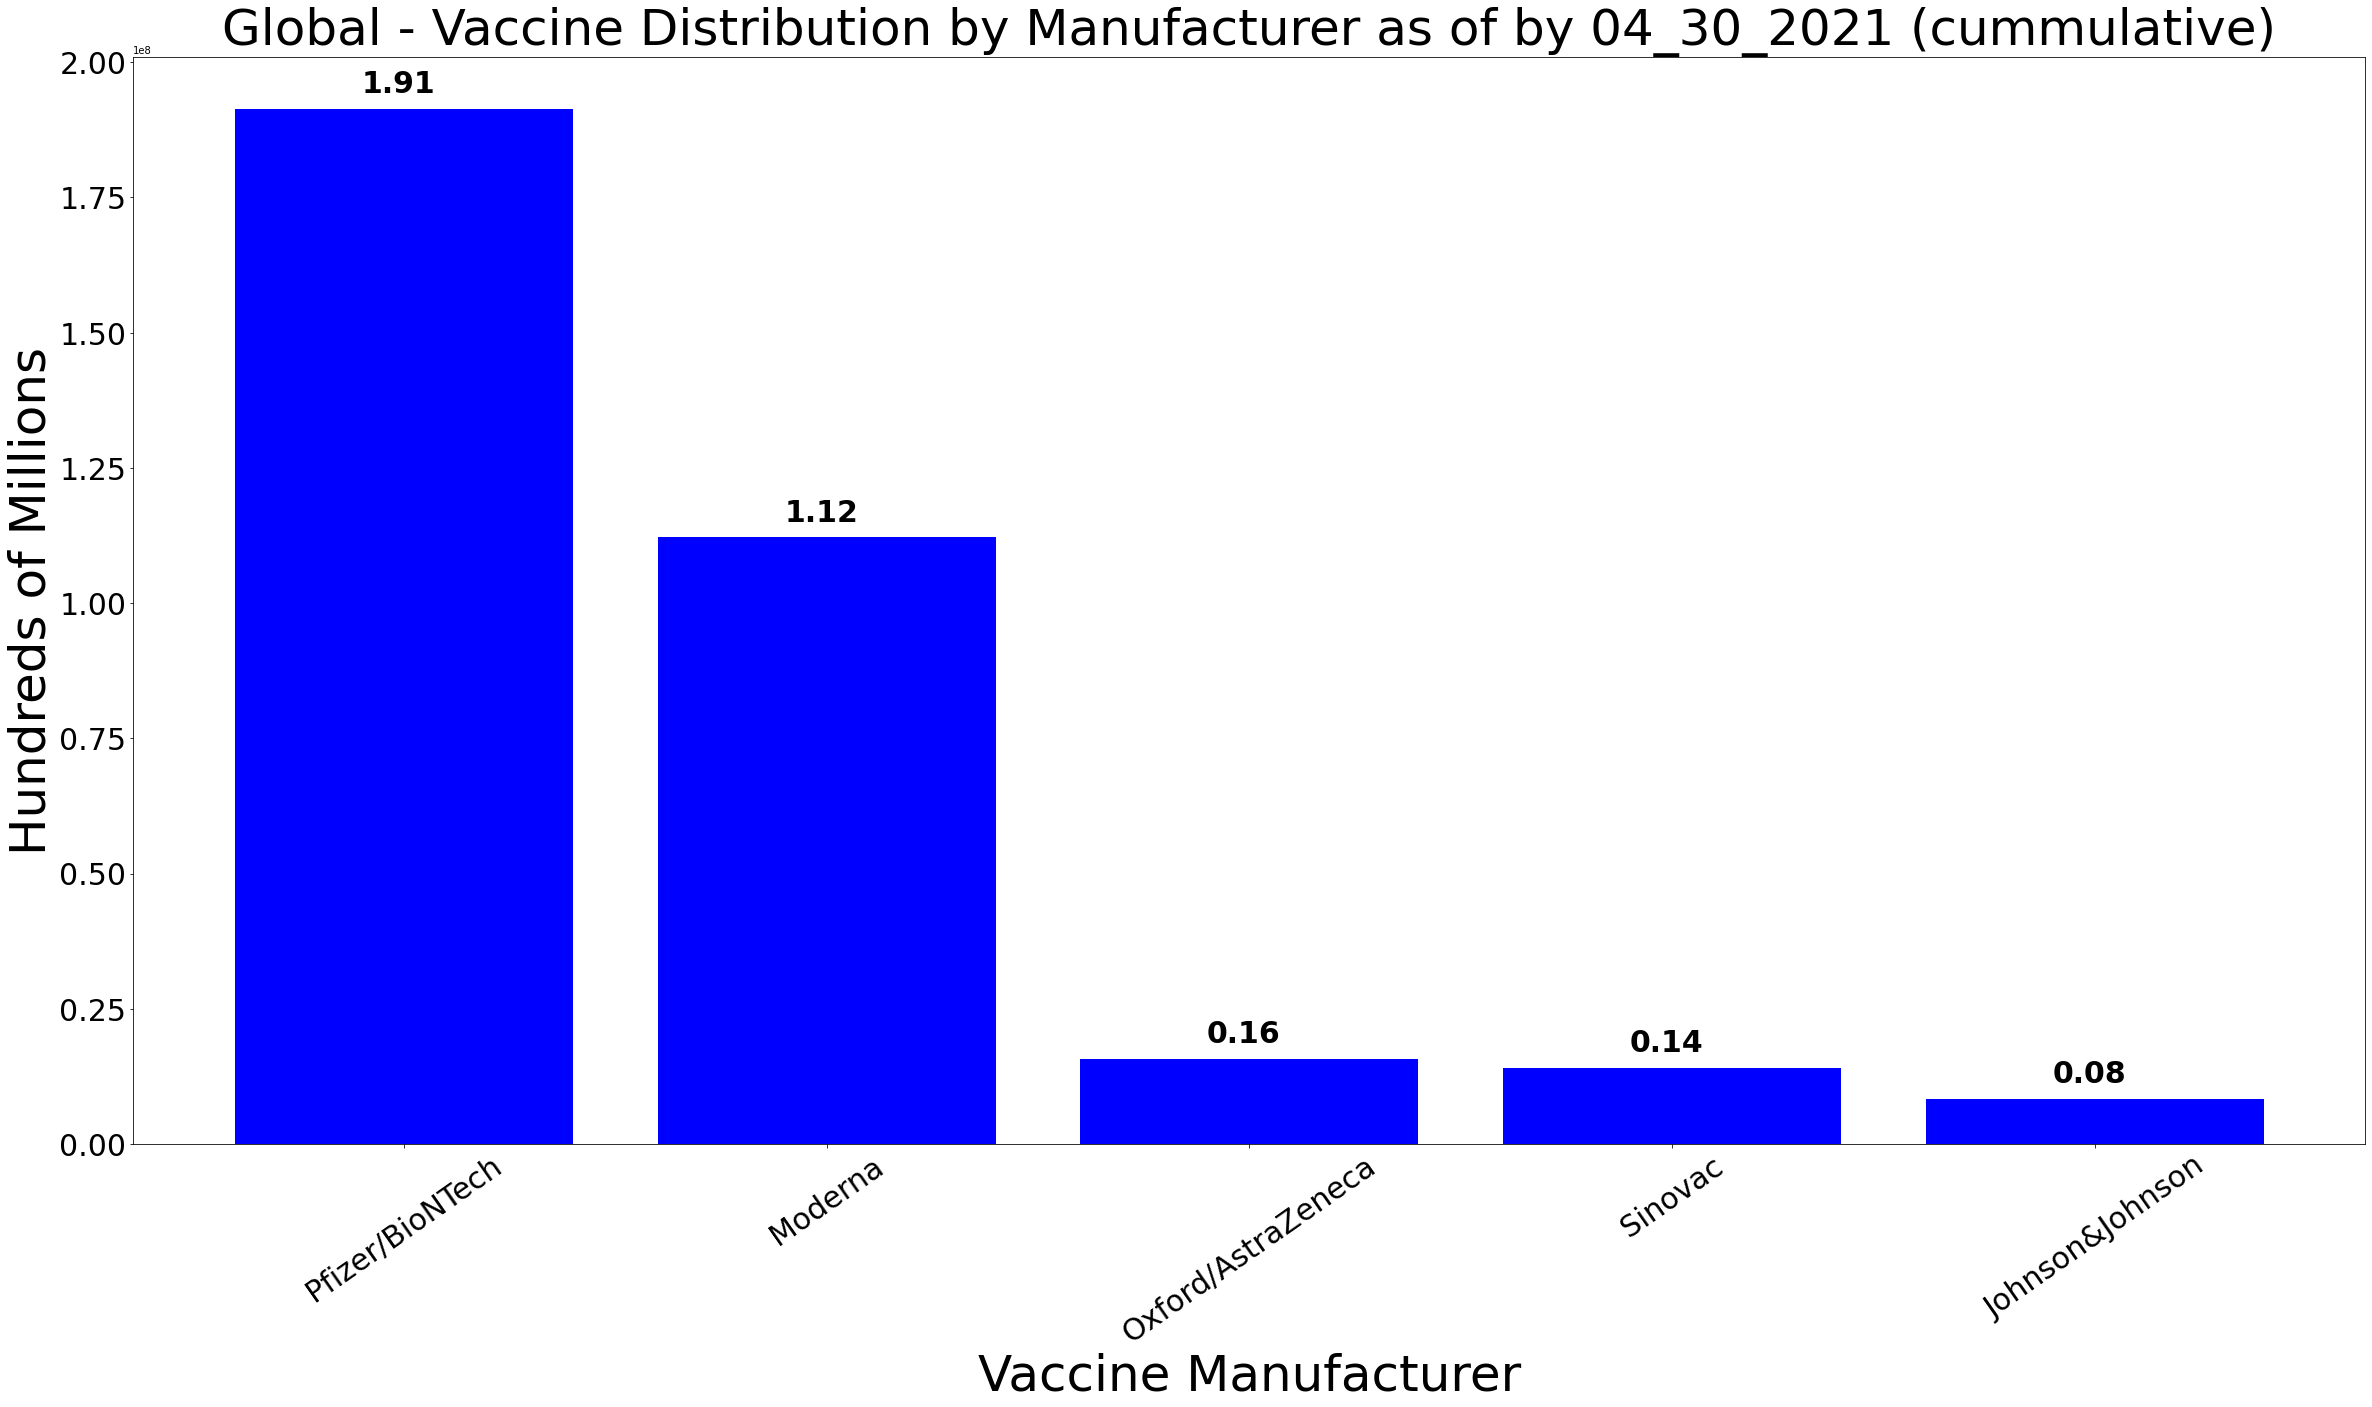

In [286]:
plt.figure(figsize=(40,20))
y_axis = filtdf_copy3["total_vaccinations"]
x_axis = filtdf_copy3.index
plt.bar(x_axis, y_axis, color='b', alpha=1.0, align="center")
plt.xlabel("Vaccine Manufacturer", fontsize = 50)
plt.ylabel("Hundreds of Millions", fontsize = 50)
plt.title("Global - Vaccine Distribution by Manufacturer as of by 04_30_2021 (cummulative)", fontsize = 50)
plt.xticks(rotation = 35,fontsize = 30)
plt.yticks(fontsize = 30)
# plt.plot(confirmed_19_df_by_date_active)
# plt.legend(["Confirmed"], loc = "upper left")
# plt.xlim(0, 100000)
# plt.ylim(0, 10)
for index,data in enumerate(y_axis):
    plt.text(x=index-.1, y =data+3000000, s=f"{format((data/100000000),'.2f')}", fontdict=dict(fontsize=30), weight="bold") 
plt.show()

In [287]:
filtdf_copy2 = filtdf_copy.groupby("location").sum()
filtdf_copy2

,total_vaccinations
location,
Chile,14883398
Czechia,3180095
France,22228471
Germany,29744323
Iceland,146084
Italy,20073883
Latvia,636132
Lithuania,987088
Romania,5232028


In [288]:
filtdf_copy2.sort_values(by = "total_vaccinations", ascending = False, inplace = True)

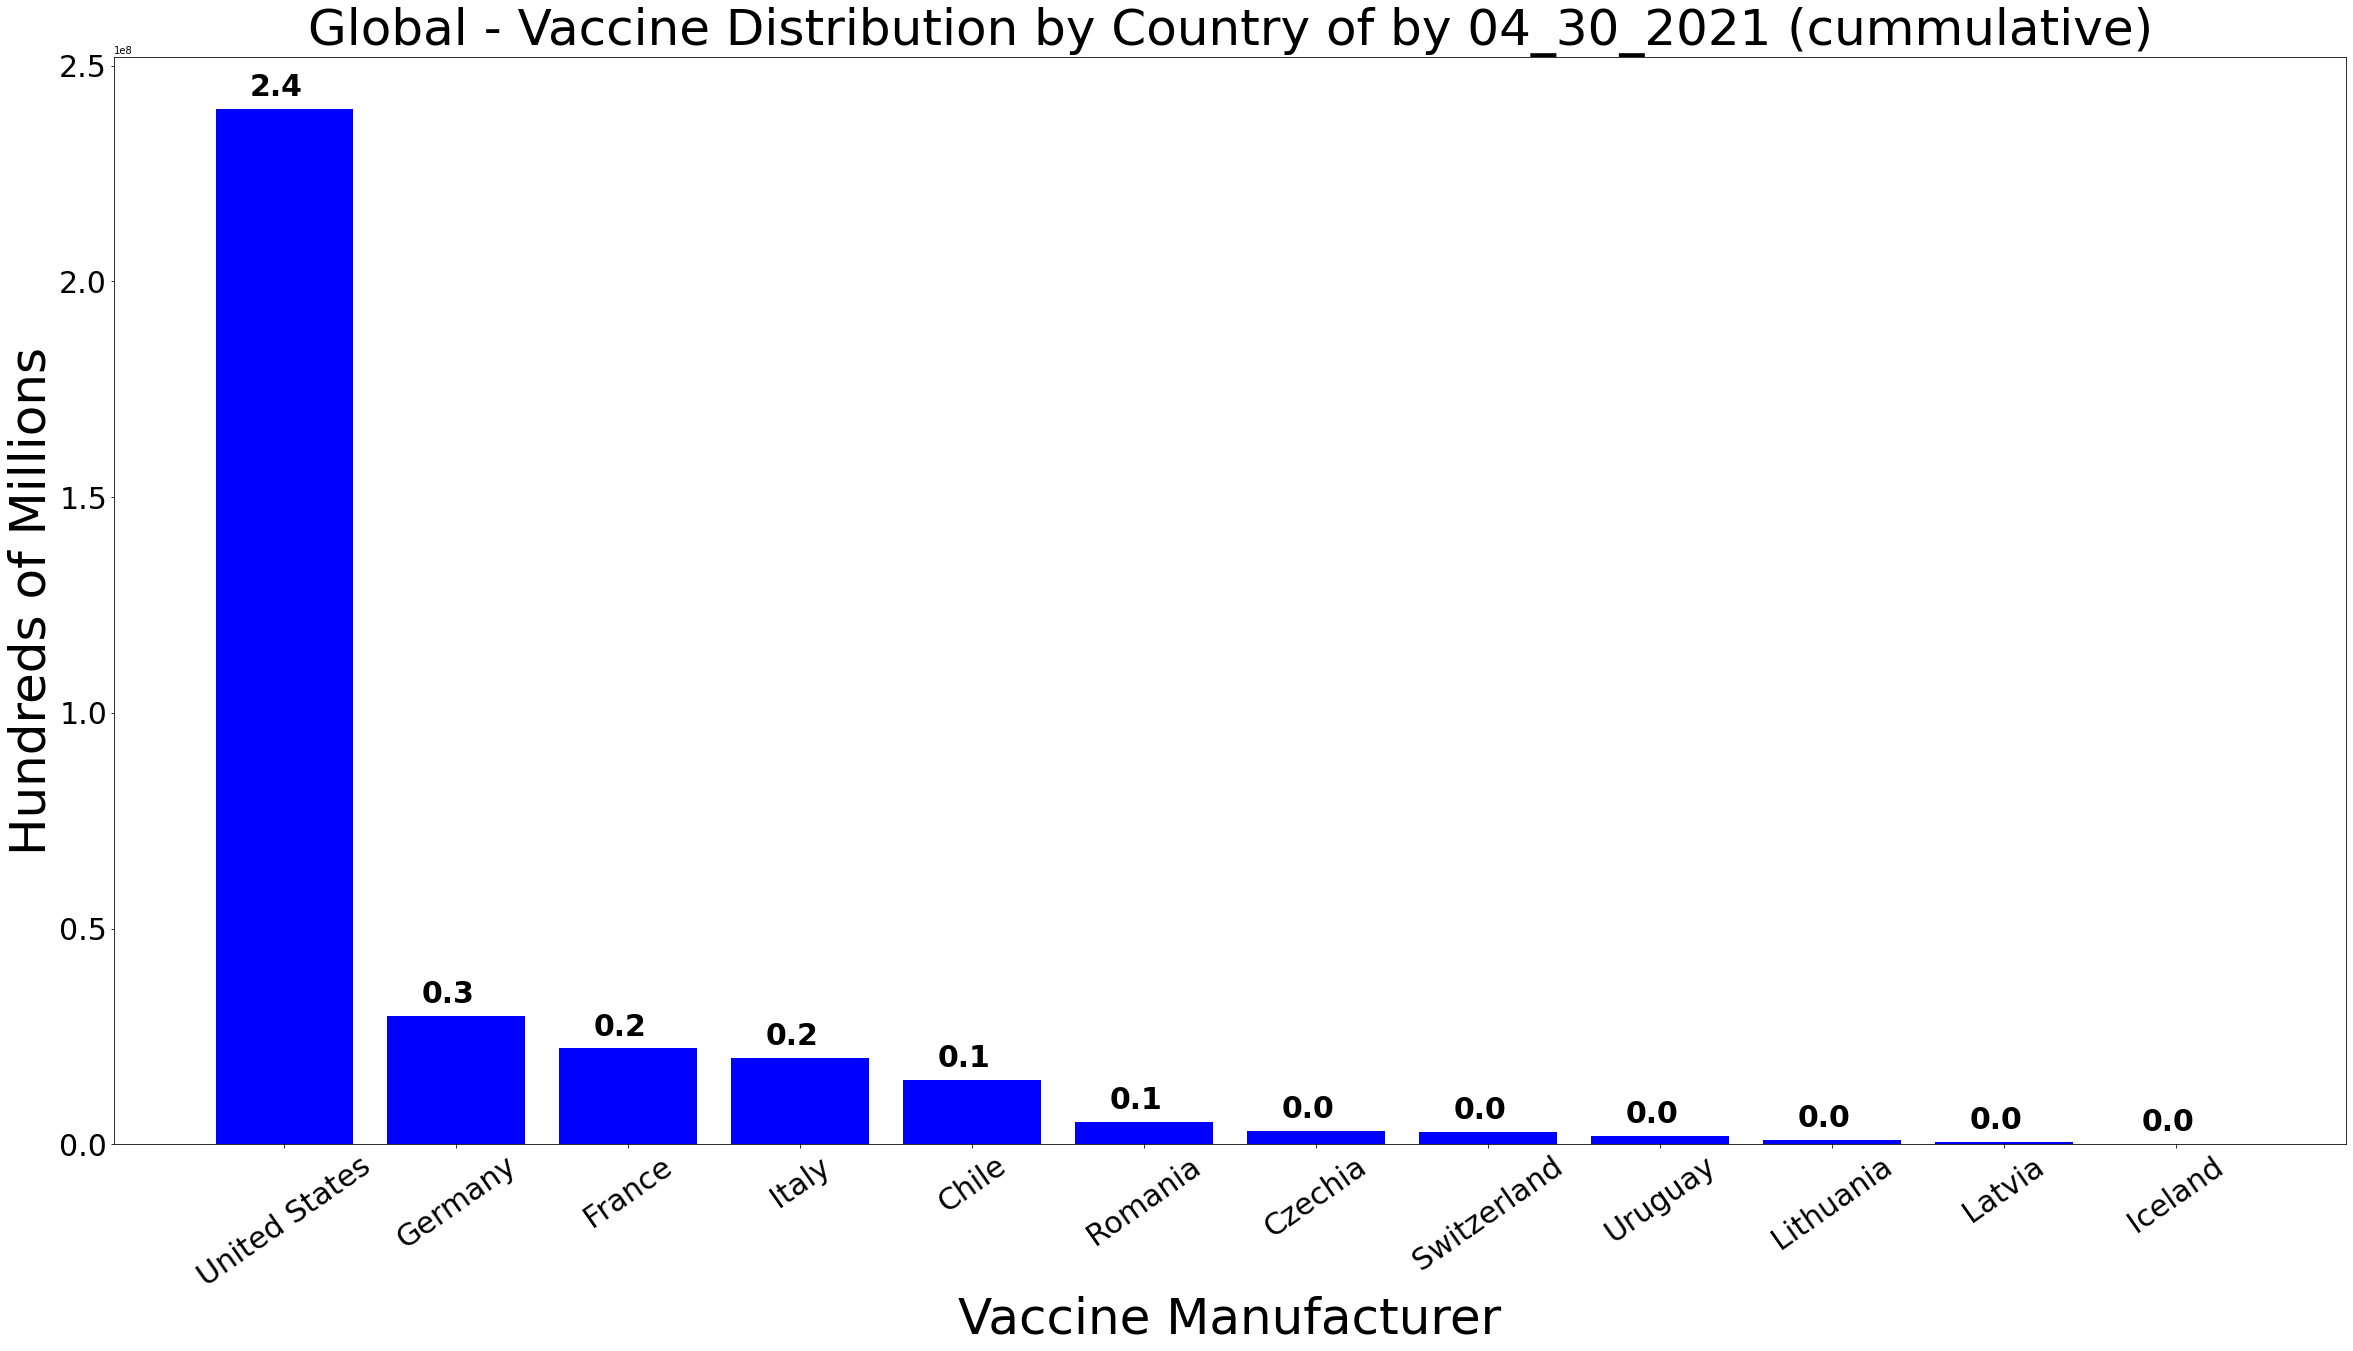

In [290]:
plt.figure(figsize=(40,20))
y_axis = filtdf_copy2["total_vaccinations"]
x_axis = filtdf_copy2.index
plt.bar(x_axis, y_axis, color='b', alpha=1.0, align="center")
plt.xlabel("Vaccine Manufacturer", fontsize = 50)
plt.ylabel("Hundreds of Millions", fontsize = 50)
plt.title("Global - Vaccine Distribution by Country of by 04_30_2021 (cummulative)", fontsize = 50)
plt.xticks(rotation = 35,fontsize = 30)
plt.yticks(fontsize = 30)
# plt.plot(confirmed_19_df_by_date_active)
# plt.legend(["Confirmed"], loc = "upper left")
# plt.xlim(0, 100000)
# plt.ylim(0, 10)
for index,data in enumerate(y_axis):
    plt.text(x=index-.2, y =data+3000000, s=f"{format((data/100000000),'.1f')}", fontdict=dict(fontsize=30), weight="bold") 
plt.show()